# Geometry of the TopArray

### quads

In [59]:
side_quad = 12
difference_holder = 17.7-side_quad
distance_between_quad_center = 17.7
side_6x6 = 6.15
quad_center_dist_from_origin = 8.85

quads = np.zeros((12*4,4))

In [9]:
quad_start_x = quad_start_y = -3*distance_between_quad_center+difference_holder/2

In [61]:
quads_x0 = quads_y0 = np.arange(quad_start_x,-quad_start_x,distance_between_quad_center)
quads_x1 = quads_y1 = quads_x0 + side_quad
quads_xx0,quads_yy0 = np.meshgrid(quads_x0 , quads_y0, indexing = 'ij')
quads_xx1,quads_yy1 = np.meshgrid(quads_x1 , quads_y1, indexing = 'ij')

## Extra quads
# on the left
quads_extra_1 = (quad_start_x - distance_between_quad_center, 
                 quad_start_x - distance_between_quad_center + side_quad,
                 difference_holder/2-distance_between_quad_center,
                 difference_holder/2-distance_between_quad_center + side_quad)
quads_extra_2 = (quad_start_x - distance_between_quad_center, 
                 quad_start_x - distance_between_quad_center + side_quad,
                 difference_holder/2,
                 difference_holder/2 + side_quad)
# on the left left
quads_extra_9 = (quad_start_x - 2*distance_between_quad_center, 
                 quad_start_x - 2*distance_between_quad_center + side_quad,
                 difference_holder/2-distance_between_quad_center,
                 difference_holder/2-distance_between_quad_center + side_quad)
quads_extra_10 = (quad_start_x - 2*distance_between_quad_center, 
                 quad_start_x - 2*distance_between_quad_center + side_quad,
                 difference_holder/2,
                 difference_holder/2 + side_quad)

# on the top
quads_extra_3 = (difference_holder/2-distance_between_quad_center,
                 difference_holder/2-distance_between_quad_center + side_quad,
                 3*distance_between_quad_center+difference_holder/2,
                 3*distance_between_quad_center+difference_holder/2 + side_quad)

quads_extra_4 = (difference_holder/2,
                 difference_holder/2 + side_quad,
                 3*distance_between_quad_center+difference_holder/2,
                 3*distance_between_quad_center+difference_holder/2 + side_quad)

# on the rigth
quads_extra_5 = (3*distance_between_quad_center+difference_holder/2, 
                 3*distance_between_quad_center+difference_holder/2 + side_quad,
                 difference_holder/2,
                 difference_holder/2 + side_quad)

quads_extra_6 = (3*distance_between_quad_center+difference_holder/2, 
                 3*distance_between_quad_center+difference_holder/2 + side_quad,
                 -difference_holder/2 - side_quad,
                 -difference_holder/2)

# on the rigth right
quads_extra_11 = (4*distance_between_quad_center+difference_holder/2, 
                 4*distance_between_quad_center+difference_holder/2 + side_quad,
                 difference_holder/2,
                 difference_holder/2 + side_quad)

quads_extra_12 = (4*distance_between_quad_center+difference_holder/2, 
                 4*distance_between_quad_center+difference_holder/2 + side_quad,
                 -difference_holder/2 - side_quad,
                 -difference_holder/2)

# on the bottom
quads_extra_7 = (difference_holder/2-distance_between_quad_center,
                 difference_holder/2-distance_between_quad_center + side_quad,
                 -4*distance_between_quad_center+difference_holder/2,
                 -4*distance_between_quad_center+difference_holder/2 + side_quad)

quads_extra_8 = (difference_holder/2,
                 difference_holder/2 + side_quad,
                 -4*distance_between_quad_center+difference_holder/2,
                 -4*distance_between_quad_center+difference_holder/2 + side_quad)

In [62]:
quads[:36,0] = quads_xx0.ravel()
quads[:36,1] = quads_xx1.ravel()
quads[:36,2] = quads_yy0.ravel()
quads[:36,3] = quads_yy1.ravel()
quads[36,:] = quads_extra_1
quads[37,:] = quads_extra_2
quads[38,:] = quads_extra_3
quads[39,:] = quads_extra_4
quads[40,:] = quads_extra_5
quads[41,:] = quads_extra_6
quads[42,:] = quads_extra_7
quads[43,:] = quads_extra_8
quads[44,:] = quads_extra_9
quads[45,:] = quads_extra_10
quads[46,:] = quads_extra_11
quads[47,:] = quads_extra_12

In [308]:
with open('TopArrayModel/quads.pck', 'wb') as file:
    pickle.dump(quads, file)

In [11]:
from matplotlib.patches import Rectangle

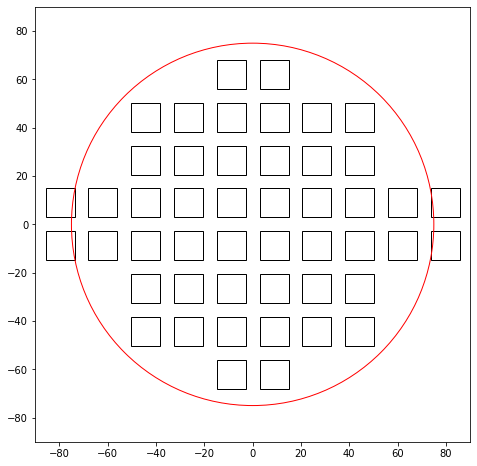

In [307]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_aspect('equal')

for _quad in quads:
    xy = (_quad[0],_quad[2])
    width = _quad[1]-_quad[0]
    height = _quad[3]-_quad[2]
    ax.add_patch(Rectangle(xy,width,height, fill = False, color = 'k'))
ax.add_patch(Circle((0,0),75, color = 'r',fill = False))

plt.show()

### 6x6s

In [155]:
sixbysixs = np.zeros((12*4*4,4))

for i_quad, quad in enumerate(quads):
    sixbysixs[i_quad*4 +0] = (quad[0], (quad[1]+quad[0])/2, quad[2], (quad[3]+quad[2])/2)
    sixbysixs[i_quad*4 +1] = ((quad[1]+quad[0])/2, quad[1], quad[2], (quad[3]+quad[2])/2)
    sixbysixs[i_quad*4 +2] = (quad[0], (quad[1]+quad[0])/2, (quad[2]+quad[3])/2, quad[3])
    sixbysixs[i_quad*4 +3] = ((quad[1]+quad[0])/2, quad[1],(quad[2]+quad[3])/2, quad[3])

In [157]:
with open('TopArrayModel/sixbysixs.pck', 'wb') as file:
    pickle.dump(sixbysixs, file)

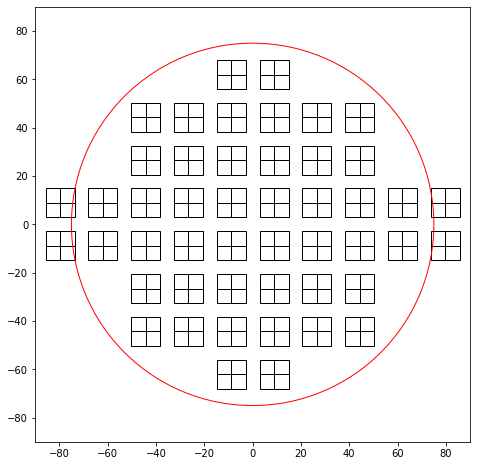

In [156]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_aspect('equal')

for _sixbysix in sixbysixs:
    xy = (_sixbysix[0],_sixbysix[2])
    width = _sixbysix[1]-_sixbysix[0]
    height = _sixbysix[3]-_sixbysix[2]
    ax.add_patch(Rectangle(xy,width,height, fill = False, color = 'k'))
ax.add_patch(Circle((0,0),75, color = 'r',fill = False))

plt.show()

### Hybrid

In [313]:
hybrid = quads.copy()
switch_list = [7,8,9,10,13,14,15,16,19,20,21,22,25,26,27,28]
hybrid = np.delete(hybrid, switch_list, axis = 0)

for quad_i in switch_list:
    quad = quads[quad_i]
    hybrid = np.vstack((hybrid,(quad[0], (quad[1]+quad[0])/2, quad[2], (quad[3]+quad[2])/2)))
    hybrid = np.vstack((hybrid,((quad[1]+quad[0])/2, quad[1], quad[2], (quad[3]+quad[2])/2)))
    hybrid = np.vstack((hybrid,(quad[0], (quad[1]+quad[0])/2, (quad[2]+quad[3])/2, quad[3])))
    hybrid = np.vstack((hybrid,((quad[1]+quad[0])/2, quad[1],(quad[2]+quad[3])/2, quad[3])))

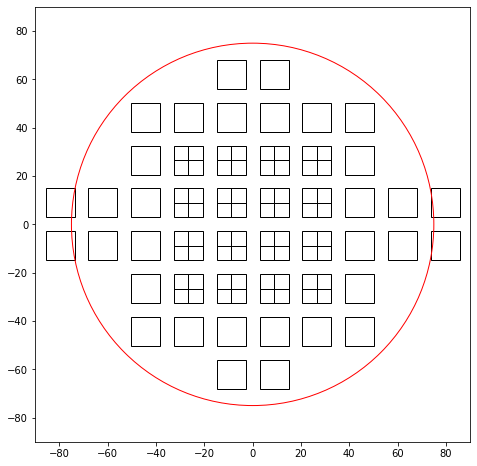

In [314]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_aspect('equal')

for _quad in hybrid:
    xy = (_quad[0],_quad[2])
    width = _quad[1]-_quad[0]
    height = _quad[3]-_quad[2]
    ax.add_patch(Rectangle(xy,width,height, fill = False, color = 'k'))
ax.add_patch(Circle((0,0),75, color = 'r',fill = False))

plt.show()

In [315]:
with open('TopArrayModel/hybrid2.pck', 'wb') as file:
    pickle.dump(hybrid, file)